In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_fighter = pd.read_csv('raw_fighter_details.csv')

## Data Preprocessing

In [3]:
raw_fighter.tail()

,fighter_name,Height,Weight,Reach,Stance,DOB
3308,Zelim Imadaev,"6' 0""",170 lbs.,"76""",Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,"5' 11""",155 lbs.,"71""",Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,"5' 4""",135 lbs.,NaN,Orthodox,NaN
3311,Zu Anyanwu,"6' 1""",251 lbs.,"77""",Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,"5' 8""",145 lbs.,"68""",Orthodox,"Jan 15, 1991"


In [4]:
raw_fighter['Stance'].value_counts()


Orthodox       1913
Southpaw        431
Switch           85
Open Stance       7
Sideways          3
Name: Stance, dtype: int64

In [6]:
raw_fighter['Stance'] = raw_fighter['Stance'].fillna('Orthodox')

In [7]:
raw_fighter['Stance'].value_counts()

Orthodox       2787
Southpaw        431
Switch           85
Open Stance       7
Sideways          3
Name: Stance, dtype: int64

In [66]:
raw_fighter['Weight'] = raw_fighter['Weight'].fillna('174 lbs.')

In [67]:
raw_fighter['Weight (lbs)']=[str(i)[:-5] for i in list(raw_fighter['Weight'])]

In [68]:
raw_fighter.head(10)

,fighter_name,Height,Weight,Reach,Stance,DOB,Weight (lbs)
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,Orthodox,NaN,145
1,AJ Matthews,"5' 11""",185 lbs.,NaN,Orthodox,NaN,185
2,AJ McKee,"5' 10""",145 lbs.,NaN,Orthodox,NaN,145
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,Orthodox,NaN,135
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,Orthodox,NaN,145
5,Aaron Brink,"6' 3""",205 lbs.,NaN,Orthodox,"Nov 12, 1974",205
6,Aaron Ely,"5' 8""",135 lbs.,NaN,Orthodox,"Mar 18, 1989",135
7,Aaron Jeffery,"6' 2""",185 lbs.,NaN,Orthodox,"Nov 14, 1992",185
8,Aaron Lanfranco,NaN,155 lbs.,NaN,Orthodox,"Aug 26, 1986",155
9,Aaron Miller,"5' 9""",145 lbs.,NaN,Orthodox,NaN,145


In [87]:
raw_fighter.count()

fighter_name    1565
Height          1565
Weight          1565
Reach           1565
Stance          1565
DOB             1565
Weight (lbs)    1565
Height(ft)      1565
dtype: int64

In [71]:
raw_fighter.dropna(subset =['Height'],inplace=True)

In [78]:
x=list(raw_fighter['Height'])
s =[int(i[:-1]) for i in x[0].split(' ')]
s[1]=s[1]/12
round(sum(s),2)

5.33

In [79]:
x = []
for i in list(raw_fighter['Height']):
    i=[int(j[:-1]) for j in i.split(' ')]
    i[1] = i[1]/12
    x.append(round(sum(i),2))
raw_fighter['Height(ft)']=x
    

In [86]:
raw_fighter.dropna(subset=['Reach','DOB'],inplace=True)

In [92]:
raw_fighter['Age'] = [2020-int(i[-4:]) for i in list(raw_fighter['DOB'])]

In [99]:
raw_fighter["Reach"] = [int(i) for i in list(raw_fighter['Reach'])]

In [102]:
raw_fighter.to_csv('fighter-details.csv',index=False)

In [100]:
raw_fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,Weight (lbs),Height(ft),Age
10,Aaron Phillips,"5' 9""",135 lbs.,70,Southpaw,"Aug 05, 1989",135,5.75,31
11,Aaron Riley,"5' 8""",155 lbs.,69,Southpaw,"Dec 09, 1980",155,5.67,40
12,Aaron Rosa,"6' 4""",205 lbs.,78,Orthodox,"May 28, 1983",205,6.33,37
13,Aaron Simpson,"6' 0""",170 lbs.,73,Orthodox,"Jul 20, 1974",170,6.00,46
17,Abdul Razak Alhassan,"5' 10""",170 lbs.,73,Orthodox,"Aug 11, 1985",170,5.83,35


## Data Visualization

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

4


<BarContainer object of 4 artists>

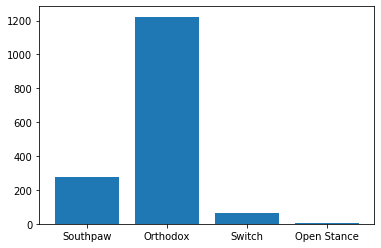

In [126]:
import collections
counts = collections.Counter(raw_fighter['Stance'])
plt.bar(range(len(counts)), list(counts.values()), tick_label=list(counts.keys())) #to understand how stance is distributed

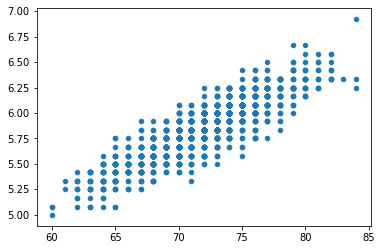

In [131]:
plt.scatter(raw_fighter['Reach'],raw_fighter['Height(ft)'],s=20) #To see how Reach varies with Height

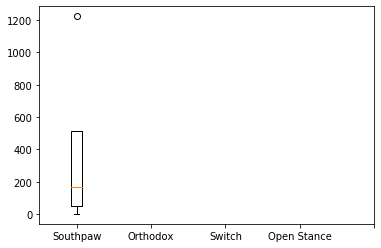

In [150]:
counts = collections.Counter(raw_fighter['Stance'])

plt.boxplot(counts.values())
plt.xticks(range(1,len(counts)+2), counts.keys());